<a href="https://colab.research.google.com/github/KassenBoyaubay/MPA-MLF-Exercises/blob/main/Finalproject/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MPA-MLF, Finalproject
### *Kassen Boyaubay*

## 0. Import libraries

In [10]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from keras import layers, Model, Sequential, Input

from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.svm import LinearSVC
from numpy import argmax

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Mount Files

In [11]:
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/Dataset'
x_train_dir = os.path.join(base_dir, 'Train/Color/')
x_test_dir = os.path.join(base_dir, 'Test/Color/')
y_train_dir = os.path.join(base_dir, 'y_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data examination

### 2.1 Size of the dataset

In [12]:
print('total training images:', len(os.listdir(x_train_dir)))
print('total test images:', len(os.listdir(x_test_dir)))

total training images: 8279
total test images: 3562


### 2.2 Explore the image

Image shape:  (539, 682, 3)


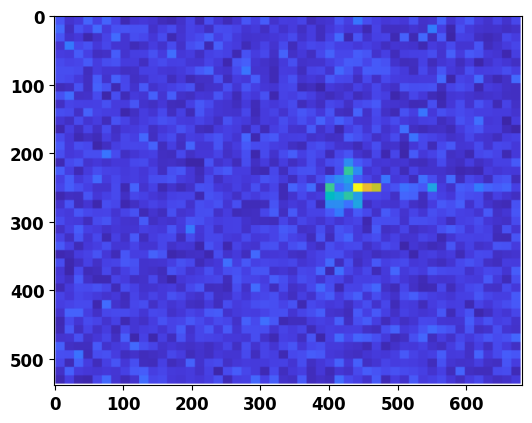

In [13]:
img_path = x_train_dir + 'img_0.png'
img = np.asarray(Image.open(img_path))
input_shape = img.shape
print('Image shape: ', input_shape)

plt.imshow(img)

### 2.3 Explore the labels

In [14]:
y_train = pd.read_csv(y_train_dir)
print(y_train.iloc[0:4])
print('y_train shape:', y_train.shape)
print('\ny_train unique values:', y_train['target'].unique())
print('labels:', len(y_train['target'].unique()))

   id  target
0   0       1
1   1       3
2   2       1
3   3       1
y_train shape: (8279, 2)

y_train unique values: [1 3 2]
labels: 3


## 3. Data preprocessing

### 3.1 x_train preprocessing

In [ ]:
x_train_dir_filenames = os.listdir(x_train_dir)
x_train = []
for filename in x_train_dir_filenames:
  x_train.append(np.asarray(Image.open(x_train_dir + filename)))
x_train = np.array(x_train)

### 3.2 x_test preprocessing

In [ ]:
x_test_dir_filenames = os.listdir(x_test_dir)
x_test = []
for filename in x_test_dir_filenames:
  x_test.append(np.asarray(Image.open(x_test_dir + filename)))
x_test = np.array(x_test)

### 3.3 y_train preprocessing

In [ ]:
num_classes = len(y_train['target'].unique())
y_train_encoded = to_categorical(y_train['target'].values-1, num_classes)
print('"target" values as array: ', y_train['target'].values)
print('one-hot encoded: \n', y_train_encoded)

"target" values as array:  [1 3 1 ... 2 1 2]
one-hot encoded: 
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 4. CNN model

### 4.1 Build CNN model

In [ ]:
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        # layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [8]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(y_train.shape)
print(y_train)

11490434/11490434 [==============================] - 1s 0us/step
(60000,)
[5 0 4 ... 5 6 8]


In [9]:
x_train.shape

(60000, 28, 28)

### 4.2 Train CNN model

In [ ]:
batch_size = 128
epochs = 1

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

### 4.3 Evaluate trained CNN model

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

fig = plt.figure(figsize=(10, 10)) # Set Figure
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('loss')

## 5. Model prediction

In [ ]:
y_pred_enc = model.predict(x_test_prepr_pca)

120/120 [==============================] - 0s 1ms/step


## 6. Export to CSV

In [ ]:
indexes = argmax(y_pred_enc, axis=1)
y_pred = indexes + 1

In [ ]:
y_pred_postpr = pd.DataFrame({'id': np.arange(0, len(y_pred)), 'target': y_pred})

In [ ]:
y_pred_postpr.to_csv('y_pred_mlp.csv', index=False)